In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bayesian_optimization import jit_plus_server

In [2]:
np.random.seed(17)
jit_plus_server([0.5])

1.5607447789648075

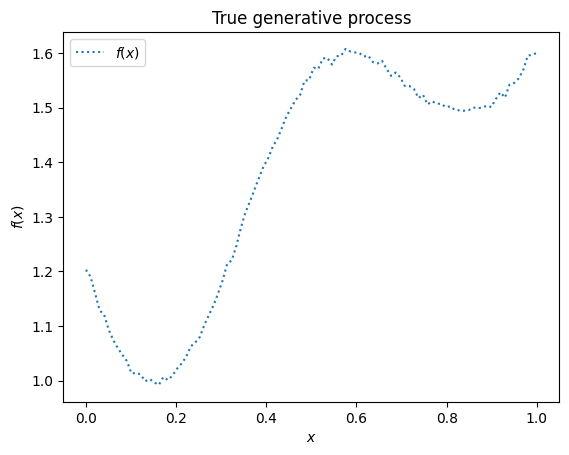

In [12]:
X = np.linspace(0, 1, 100)
y = np.array([jit_plus_server([X_i]) for X_i in X])
plt.plot(x, y, label="$f(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("True generative process");

In [31]:
rng = np.random.RandomState(17)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train.reshape(-1, 1), y_train)
gaussian_process.kernel_

1.17**2 * RBF(length_scale=0.341)

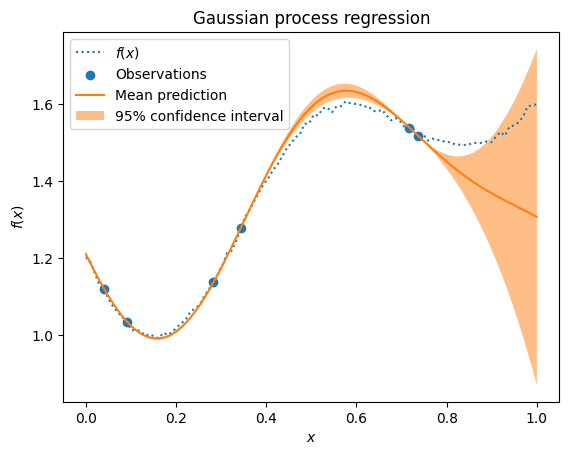

In [33]:
mean_prediction, std_prediction = gaussian_process.predict(
    X.reshape(-1, 1), return_std=True
)
plt.plot(X, y, label="$f(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X,
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label="95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression");